<a href="https://colab.research.google.com/github/omerfarukballi/teanetworkscase/blob/main/TeaNetworks_CaseStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Library Import
import pandas as pd
from sklearn.model_selection import train_test_split
import time
import tracemalloc
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import time
import os
import psutil

In [ ]:
#Dataset Reading
data=pd.read_csv('app.csv',delimiter=";")
data['time'] = pd.to_datetime(data['time'])
data=data.set_index('time')
data.dtypes

users       int64
sessions    int64
newusers    int64
crashes     int64
dtype: object

In [ ]:
x=data.drop(columns=['users'])
y=data['users']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.035, shuffle=False)

In [ ]:
#Statistical Examination
data.describe()

,users,sessions,newusers,crashes
count,169.000000,169.000000,169.000000,169.000000
mean,74.153846,71.508876,8.301775,0.325444
std,28.776437,29.637114,4.482512,0.790948
min,18.000000,8.000000,1.000000,0.000000
25%,48.000000,47.000000,5.000000,0.000000
50%,72.000000,67.000000,8.000000,0.000000
75%,97.000000,96.000000,11.000000,0.000000
max,141.000000,148.000000,22.000000,6.000000


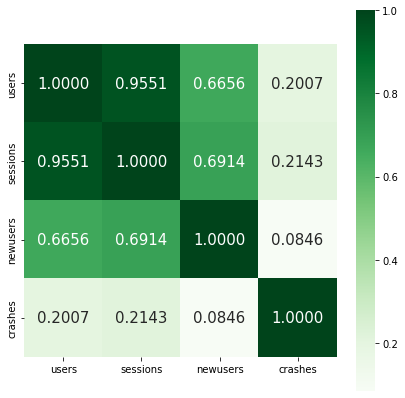

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(data.corr(), cbar=True, square= True, fmt='.4f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febee1ded10>,
      dtype=object)

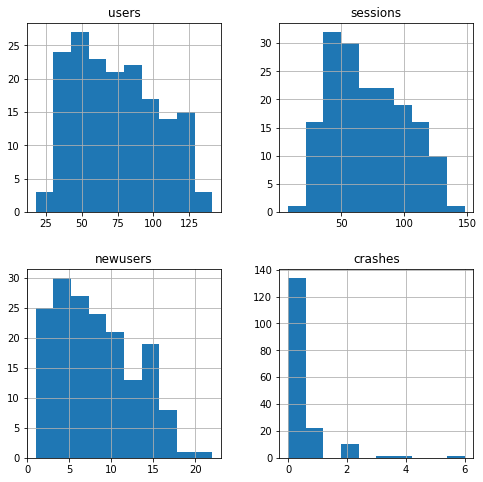

In [ ]:

fig, axis = plt.subplots(2,2,figsize=(8, 8))
data.hist(ax=axis)

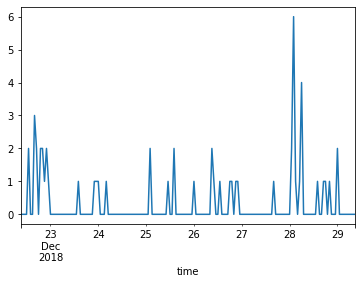

In [ ]:
data.crashes.plot.line()

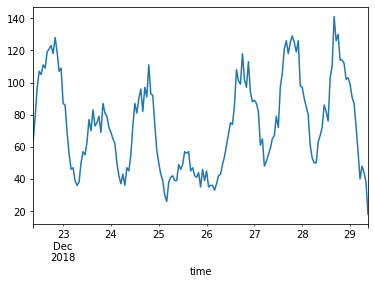

In [ ]:
data.users.plot.line()

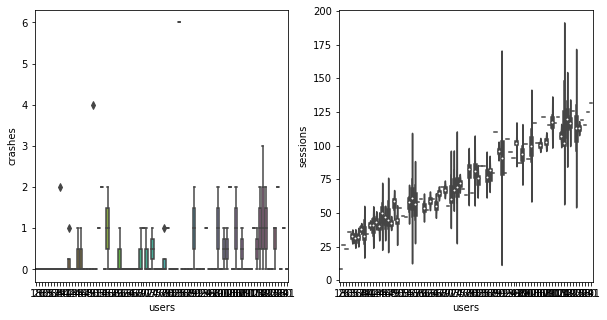

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(x="users", y="crashes", data=data)
plt.subplot(1,2,2)
sns.violinplot(x="users", y="sessions", data=data)
plt.show()

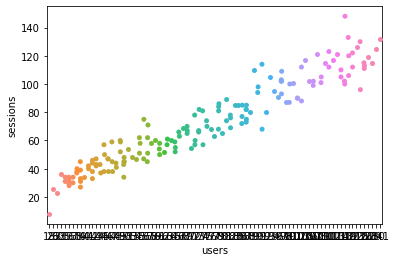

In [ ]:
sns.stripplot(x="users", y="sessions", data=data, jitter=True, edgecolor="gray")
plt.show()

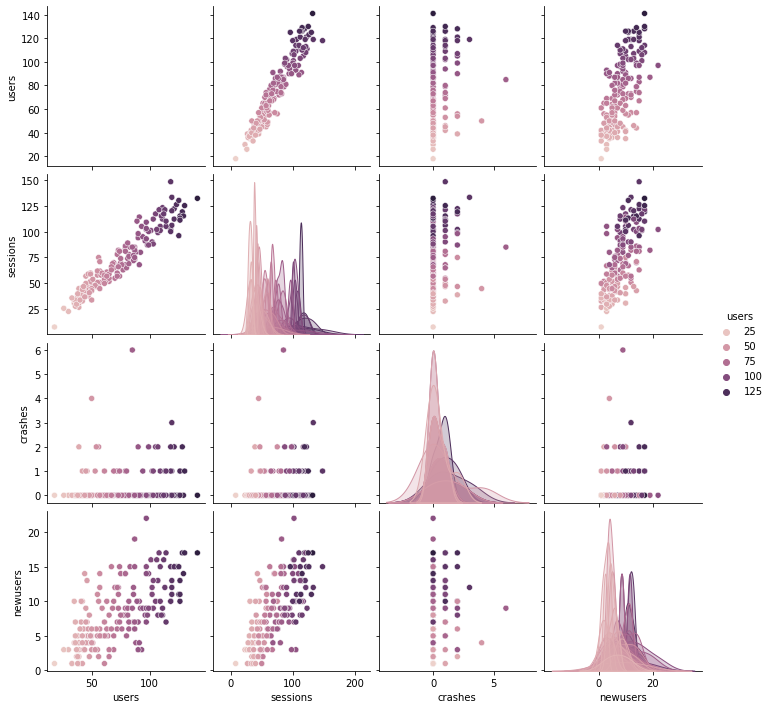

In [ ]:
sns.pairplot(data, hue="users", vars = ["users", "sessions", "crashes", "newusers"])
plt.show()

In [ ]:
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)
print("Size of pred training set:", y_train.shape)
print("Size of pred test set:", y_test.shape)

Size of training set: (163, 3)
Size of test set: (6, 3)
Size of pred training set: (163,)
Size of pred test set: (6,)


In [ ]:
#Modelling
clf = DecisionTreeRegressor()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
acc_decision= metrics.r2_score(y_test, y_pred)
print( 'Accuracy of Decision Tree Regression model : ', acc_decision )

Accuracy of Decision Tree Regression model :  0.5238095238095237


In [ ]:
parameters = {'max_features': ['log2', 'sqrt','auto'], 
              'max_depth': [2, 3, 5, 10, 50], 
              'min_samples_split': [2, 3, 50, 100],
              'min_samples_leaf': [1, 5, 8, 10]
             }
# Run the grid search
grid_obj = GridSearchCV(clf, parameters)
grid_obj = grid_obj.fit(X_train, y_train)
# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_
# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=10)

In [ ]:
y_pred = clf.predict(X_test)
acc_dt = round( metrics.r2_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Decision Tree model : ', acc_dt )

Accuracy of Decision Tree model :  37.49


In [ ]:
parameters = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
}
regr = RandomForestRegressor(random_state=0)

clf = GridSearchCV(regr, parameters)
clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
metrics.r2_score(y_train, y_pred_train)

0.9464811191295699

In [ ]:
acc_randomforest = round( metrics.r2_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Random Forest model : ', acc_randomforest )

Accuracy of Random Forest model :  37.49


In [ ]:
#Making Functions
def data(csv):
  data=pd.read_csv(csv, delimiter=';')
  data=data.set_index('time')
  x=data.drop(columns=['users'])
  y=data['users']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.035, shuffle=False)
  return X_train, X_test, y_train, y_test

def model(X_train, X_test, y_train, y_test):
  param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [100, 200, 300, 1000]
  }
  regr = RandomForestRegressor(random_state=0)
  clf = GridSearchCV(regr, param_grid)
  clf.fit(X_train, y_train)
  y_pred_train = clf.predict(X_train)
  y_pred = clf.predict(X_test)
  print("Training Dataset R2 Score",metrics.r2_score(y_train, y_pred_train))
  print("Training Dataset MSE Score",metrics.mean_squared_error(y_train, y_pred_train))
  print("Test Dataset R2 Score",metrics.r2_score(y_test, y_pred))
  print("Test Dataset MSE Score",metrics.mean_squared_error(y_test, y_pred))

In [ ]:
#Results
def main():
  tracemalloc.start()
  start = time.time()
  print("Function Started")
  X_train, X_test, y_train, y_test = data('app.csv')
  model(X_train, X_test, y_train, y_test)
  end = time.time()
  print("Total Duration:",end - start)
  print("Total Allocated Memory:",tracemalloc.get_traced_memory())
  return True

In [ ]:
main()

Function Started
Training Dataset R2 Score 0.9503883076264802
Training Dataset MSE Score 39.98106370370037
Test Dataset R2 Score 0.4703623221410017
Test Dataset MSE Score 75.28211104456928
Total Duration: 298.92940044403076
Total Allocated Memory: (5561844, 22781048)


True